# <center>Twitter Sentiment Analysis
- Tushar Pagadala Ashok    2130680
- Akhil Kaundinya Metlakunta    2959252
- Jackson Alexander    2190216
- Nikhitha Dasi Srinivas    2922544  

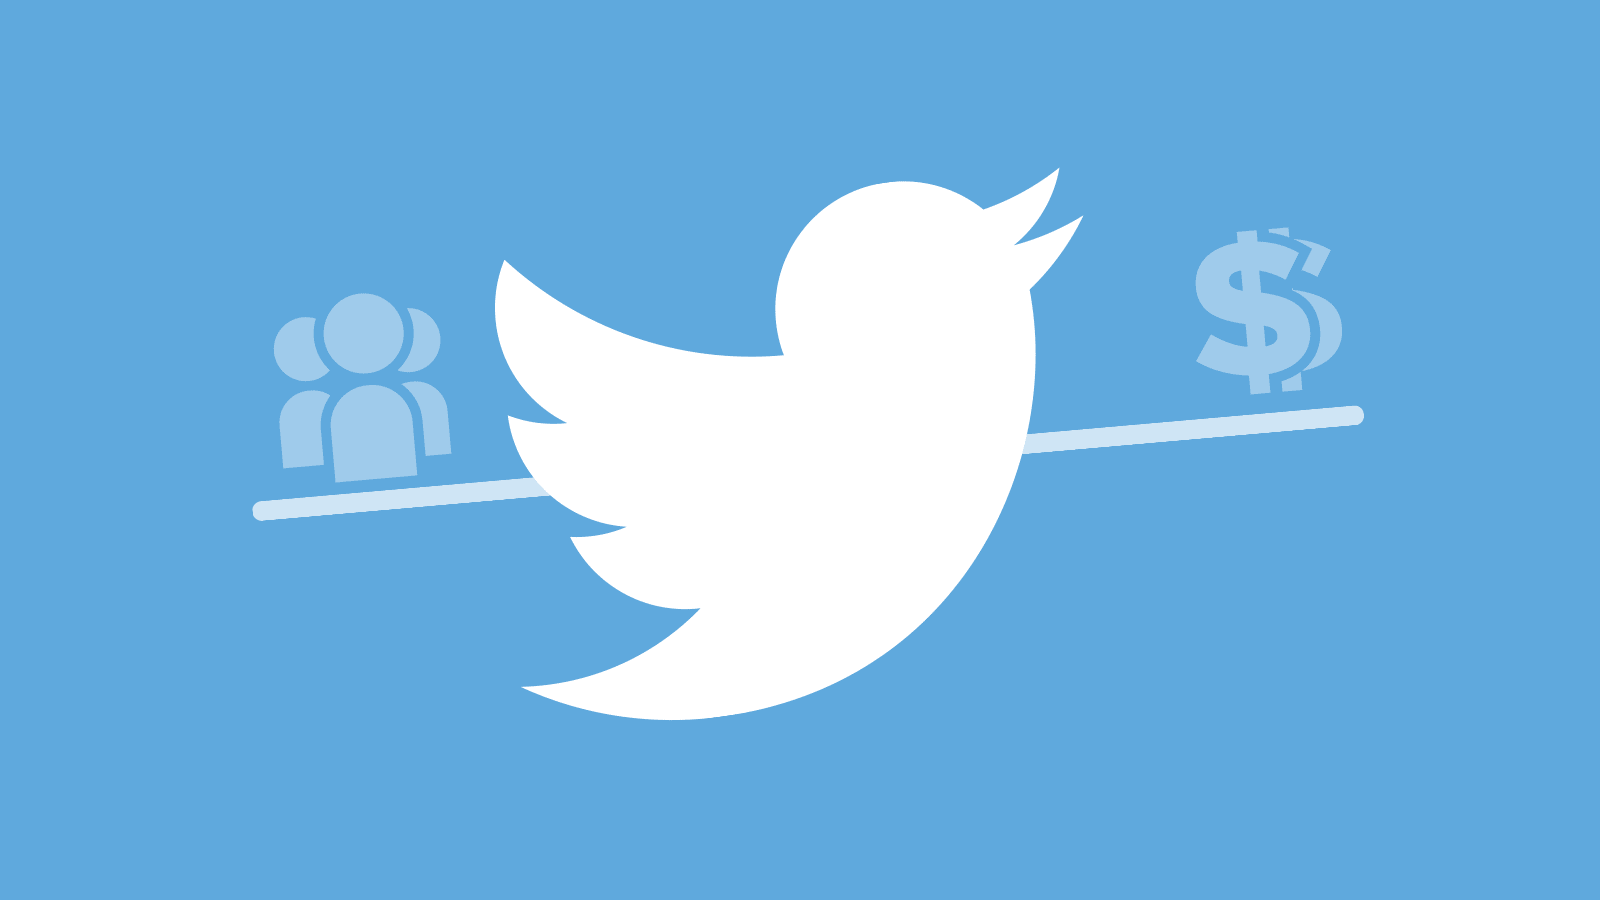

### Brief Introduction
<p style='text-align: justify;'>Sentiment analysis is the Machine learning process used for classifying text data according to their polarity,feelings and emotions, urgency and even intentions. Huge multinational companies like Youtube, Facebook, Twitter , Netflix, etc. have started levaraging sentiment analysis to extratct subjective information from original data providing bettwer sense of how customers are talking about their products and services, to get insigts about buisness and to identify product issues.some of the most popularly used sentiment analysis are graded, emotion, aspect based and multlingual sentiment analysis. We will be using Aspect based sentiment analysis in our notebook which will analyze sentiments based on polarity like positive, negative or neutral.</p>

### Problem statement 
<p style='text-align: justify;'>With all of the tweets circulating every second it is hard to tell whether the sentiment behind a specific tweet will impact a company, or a person , or a brand. And, thats when sentiment analysis comes into picture by capturing a sentiment or emotion in a language.</p>

<p style='text-align: justify;'>In this notebook we are implementing three models for Twitter sentiment analysiswhich will help us overcome the challenges of identifying the sentiments of the tweets.</p>

### Table of contents
- Importing libraries
- Loading the dataset
- Data Pre-Processing 
    - Checking for Null values 
    - Standardization
    - Removing Contractions
    - Tokenization
    - Stopwords Removal
    - Parts-of-Speech Tagging
    - Lemmatization
- Statistical Text Analysis 
    - Finding Text Length & Word frequency
    - Text Length Analysis
    - Word Count Analysis
    - Most Frequent Words In Each Sentiment
    - Word Cloud For Tweets Based On Sentiments
    - Unique Words
- Pre-Processing for Modelling
- Modeling
    - Bidirectional - LSTM using Neural Networks
    - Using CNN with Hyper-parameter Tuning
    - RNN with Hyper-Parameter Tuning
- References

### Importing Libraries

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords, wordnet
import seaborn as sns
import contractions
import re
import string
from nltk.tokenize import word_tokenize
from collections import Counter
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from nltk.probability import FreqDist
from palettable.colorbrewer.qualitative import Pastel1_7
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# pip install wordcloud
# pip install nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

### Loading the dataset 
Dataset can be accessed from 
- https://www.kaggle.com/competitions/tweet-sentiment-extraction/overview

In [3]:
#loading the dataset
tweet_df = train = pd.read_csv('train.csv')
df = tweet_df

In [4]:
tweet_df.shape

(27481, 4)

In [5]:
tweet_df

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral  
1                                               Sooo SAD  negative  
2                                            bullying me  negative  
3                                         leave me alone  negative  
4                                          Sons of ****,  negative  
...                                                  ...       ...  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral  

[27481 rows x 4 columns]

In [6]:
print(tweet_df.shape)

(27481, 4)


# Data Pre-Processing 
As we all know that pre processing is an important step while building a ML model. We have done the following text pre processing:-
- Checking for Null values 
- Standardization
- Removing Contractions
- Tokenization
- Stopwords Removal
- Parts-of-Speech Tagging
- Lemmatization

### Checking for Null values
Before going forward we will remove lets see if we have any null values and in case if any we can remove them.

In [7]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [8]:
#Checking for null values
null_val= tweet_df.isna().sum()
null_val

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

<AxesSubplot:xlabel='Feature', ylabel='MissingCount'>

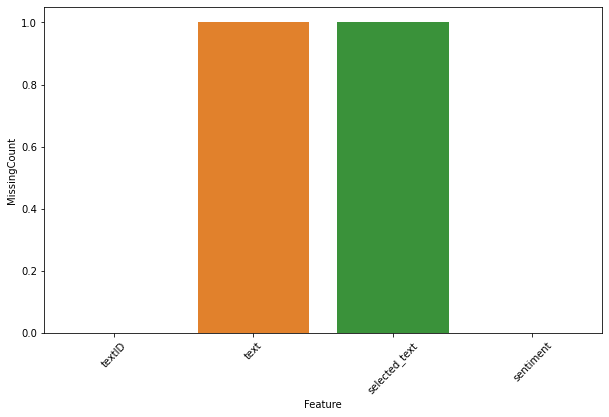

In [9]:
#Plotting the count of nulls in each column
null_val = pd.DataFrame(null_val)
null_val.reset_index(inplace = True)
null_val.columns = ["Feature","MissingCount"]
plt.figure(figsize = (10,6))
plt.xticks(rotation=46)
sns.barplot(x = "Feature",y ="MissingCount",data = null_val)

In [10]:
#dropping selected_text column
tweet_df.drop('selected_text', axis=1, inplace=True)
tweet_df.head()

textID                                               text sentiment
0  cb774db0d1                I`d have responded, if I were going   neutral
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!  negative
2  088c60f138                          my boss is bullying me...  negative
3  9642c003ef                     what interview! leave me alone  negative
4  358bd9e861   Sons of ****, why couldn`t they put them on t...  negative

In [11]:
#printing the missing value
tweet_df[tweet_df.isna().any(axis=1)]

textID text sentiment
314  fdb77c3752  NaN   neutral

In [12]:
#replacing the missing value
# text has only 1 missing value with neutral sentiment, lets replace the null with a neural statement
tweet_df["text"].fillna("It's interesting", inplace = True)
tweet_df.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [13]:
# Sentiment Distribution
tweet=train['sentiment'].value_counts()
tweet

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

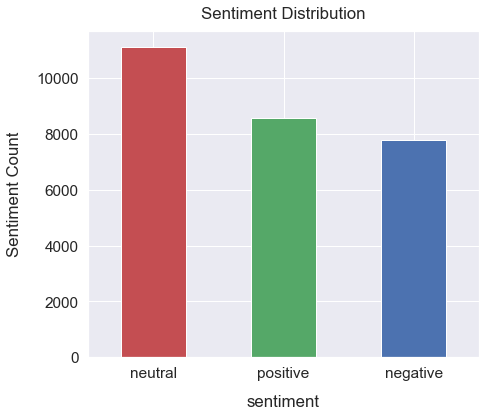

In [14]:
# Distribution plots based on sentiment
sns.set(font_scale=1.4)
tweet_df['sentiment'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=["r", "g", "b"])

plt.xlabel("sentiment", labelpad=14)
plt.ylabel("Sentiment Count", labelpad=14)
plt.title("Sentiment Distribution", y=1.02);


<AxesSubplot:ylabel='sentiment'>

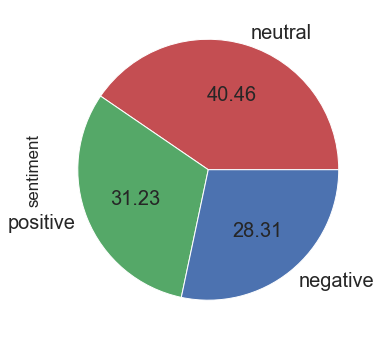

In [15]:
tweet.plot.pie(
    labels=["neutral", "positive", "negative"],
    colors=["r", "g", "b"],
    autopct="%.2f",
    fontsize=20,
    figsize=(6, 6),
)

In [16]:
#most frequently used words
tweet_df['freq_words'] = tweet_df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tweet_df['freq_words'] for item in sublist])
tweety= pd.DataFrame(top.most_common(10))
tweety.columns = ['freq_words','Word_count']
tweety.style.background_gradient(cmap='Oranges')

### Standardization
This is the most common techniquein in text cleaning or text pre processing in which we convert all words in a text to lower or upper case.

In [17]:
#standardization on Text - converting all the data to lowercase
tweet_df["text_lowerCase"] = tweet_df["text"].apply(lambda t: t.lower())

### Contraction Removal
- This technique is used to convert all words in a text to same feature space which will remove diversity and exception problem. 
- We are using a contractions which is imported from nltx library to write a function which will remove square breackets, http, url, special characters, punctuations and text/words containg numbers.

In [18]:
#Removing text Contractions
#many of the words have contractions in them, removing contractions helps in text standardization
tweet_df['no_txt_contrac'] = tweet_df['text_lowerCase'].apply(lambda t: ' '.join([contractions.fix(word) for word in str(t).replace('`', '\'').split()]))

In [19]:
#Cleaning the data by removing square breackets, http, url, special characters, punctuations and text/words containg numbers 

def tweet_df_clean(no_txt_contrac):
    no_txt_contrac = re.sub('\[.*?\]', '', no_txt_contrac) #square brackets
    no_txt_contrac = re.sub('https?://\S+|www\.\S+', '', no_txt_contrac) #https
    no_txt_contrac = re.sub('<.*?>+', '', no_txt_contrac) #special char
    no_txt_contrac = re.sub('[%s]' % re.escape(string.punctuation), '', no_txt_contrac) #punctuations
    no_txt_contrac = re.sub('\n', '', no_txt_contrac) #spaces
    no_txt_contrac = re.sub('\w*\d\w*', '', no_txt_contrac) #words/sentances with numbers    
    
    return no_txt_contrac
#printing the cleaned data
tweet_df['Clean_text'] = tweet_df['no_txt_contrac'].apply(lambda t:tweet_df_clean(t))
tweet_df.head(4)

textID                                            text sentiment  \
0  cb774db0d1             I`d have responded, if I were going   neutral   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                       my boss is bullying me...  negative   
3  9642c003ef                  what interview! leave me alone  negative   

                                          freq_words  \
0        [I`d, have, responded,, if, I, were, going]   
1  [Sooo, SAD, I, will, miss, you, here, in, San,...   
2                    [my, boss, is, bullying, me...]   
3               [what, interview!, leave, me, alone]   

                                   text_lowerCase  \
0             i`d have responded, if i were going   
1   sooo sad i will miss you here in san diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   

                                  no_txt_contrac  \
0        i would have responded, if i were going   
1  sooo sad i will miss you here in san diego!!!   
2                      my boss is bullying me...   
3                 what interview! leave me alone   

                                   Clean_text  
0      i would have responded if i were going  
1  sooo sad i will miss you here in san diego  
2                      my boss is bullying me  
3               what interview leave me alone

### Tokenization
The most important step in text preprocessing is toxenization. tokenization is a process of breaking a text data into words,texts or some other meaningful elements called tokens.When we split the text into sentences, we call it sentence tokenization. For words, we call it word tokenization. In our notebook we are using word tokenization.

In [20]:
#tokenizing the text
#In order for this sentence to be understood by a machine, tokenization is performed on the string to break it into individual parts
tweet_df['tokenized_text'] = tweet_df['Clean_text'].apply(word_tokenize)
tweet_df.head(4)

textID                                            text sentiment  \
0  cb774db0d1             I`d have responded, if I were going   neutral   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                       my boss is bullying me...  negative   
3  9642c003ef                  what interview! leave me alone  negative   

                                          freq_words  \
0        [I`d, have, responded,, if, I, were, going]   
1  [Sooo, SAD, I, will, miss, you, here, in, San,...   
2                    [my, boss, is, bullying, me...]   
3               [what, interview!, leave, me, alone]   

                                   text_lowerCase  \
0             i`d have responded, if i were going   
1   sooo sad i will miss you here in san diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   

                                  no_txt_contrac  \
0        i would have responded, if i were going   
1  sooo sad i will miss you here in san diego!!!   
2                      my boss is bullying me...   
3                 what interview! leave me alone   

                                   Clean_text  \
0      i would have responded if i were going   
1  sooo sad i will miss you here in san diego   
2                      my boss is bullying me   
3               what interview leave me alone   

                                      tokenized_text  
0    [i, would, have, responded, if, i, were, going]  
1  [sooo, sad, i, will, miss, you, here, in, san,...  
2                       [my, boss, is, bullying, me]  
3                [what, interview, leave, me, alone]

### Stopwords Removal
Stopewords are the most common words. They can safely be removed or ignored without sacrifising the actual meaning of a sentance. We have used nltk library to remove stopwords like i, if ,were , etc.

In [21]:
#Removing Stopword from text
#Stopwords are the commonly used words that they carry very little useful information
stop = set(stopwords.words('english'))
tweet_df['stopwords'] = tweet_df['tokenized_text'].apply(lambda t: [word for word in t if word not in stop])
tweet_df.head(4)

textID                                            text sentiment  \
0  cb774db0d1             I`d have responded, if I were going   neutral   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                       my boss is bullying me...  negative   
3  9642c003ef                  what interview! leave me alone  negative   

                                          freq_words  \
0        [I`d, have, responded,, if, I, were, going]   
1  [Sooo, SAD, I, will, miss, you, here, in, San,...   
2                    [my, boss, is, bullying, me...]   
3               [what, interview!, leave, me, alone]   

                                   text_lowerCase  \
0             i`d have responded, if i were going   
1   sooo sad i will miss you here in san diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   

                                  no_txt_contrac  \
0        i would have responded, if i were going   
1  sooo sad i will miss you here in san diego!!!   
2                      my boss is bullying me...   
3                 what interview! leave me alone   

                                   Clean_text  \
0      i would have responded if i were going   
1  sooo sad i will miss you here in san diego   
2                      my boss is bullying me   
3               what interview leave me alone   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   
3                [what, interview, leave, me, alone]   

                       stopwords  
0      [would, responded, going]  
1  [sooo, sad, miss, san, diego]  
2               [boss, bullying]  
3      [interview, leave, alone]

### Parts-of-Speech Tagging
This technique is used to categorize words ina text with respect to their parts of speeech depending on definition and context. In other words this is a process of assigning a tag to a word based on parts of speech.

In [22]:
# After we have tokenized and removed stop words 
#Lets add POS(Parts of speeech) tagging to each word
tweet_df['Tagging'] = tweet_df['stopwords'].apply(lambda t: nltk.tag.pos_tag(t))

# now converting them to adjective, verb, noun and adverb
def get_Tagging(Tagging):
    if Tagging.startswith('J'):
        return wordnet.ADJ
    elif Tagging.startswith('V'):
        return wordnet.VERB
    elif Tagging.startswith('N'):
        return wordnet.NOUN
    elif Tagging.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    
tweet_df['Tagging'] = tweet_df['Tagging'].apply(lambda x: [(word, get_Tagging(Tagging)) 
                                                               for (word, Tagging) in x])
tweet_df.head(4)

textID                                            text sentiment  \
0  cb774db0d1             I`d have responded, if I were going   neutral   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                       my boss is bullying me...  negative   
3  9642c003ef                  what interview! leave me alone  negative   

                                          freq_words  \
0        [I`d, have, responded,, if, I, were, going]   
1  [Sooo, SAD, I, will, miss, you, here, in, San,...   
2                    [my, boss, is, bullying, me...]   
3               [what, interview!, leave, me, alone]   

                                   text_lowerCase  \
0             i`d have responded, if i were going   
1   sooo sad i will miss you here in san diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   

                                  no_txt_contrac  \
0        i would have responded, if i were going   
1  sooo sad i will miss you here in san diego!!!   
2                      my boss is bullying me...   
3                 what interview! leave me alone   

                                   Clean_text  \
0      i would have responded if i were going   
1  sooo sad i will miss you here in san diego   
2                      my boss is bullying me   
3               what interview leave me alone   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   
3                [what, interview, leave, me, alone]   

                       stopwords  \
0      [would, responded, going]   
1  [sooo, sad, miss, san, diego]   
2               [boss, bullying]   
3      [interview, leave, alone]   

                                             Tagging  
0           [(would, n), (responded, v), (going, v)]  
1  [(sooo, a), (sad, a), (miss, n), (san, n), (di...  
2                         [(boss, n), (bullying, v)]  
3           [(interview, n), (leave, v), (alone, r)]

### Lemmatization
This technique is used to reduce a word to its rote word or lemma. Although, stemming does the same thing but we are using lemmatization because in stemming the words are chopped off and are meaningless but where as is lemmatizati

In [23]:
#converting a word to its meaningful base or root form by Lemmatization
from nltk.stem import WordNetLemmatizer
lm = nltk.WordNetLemmatizer()
tweet_df['lemmatization'] = tweet_df['Tagging'].apply(lambda m:[lm.lemmatize(w,t) for w ,t in m])

tweet_df.head()

textID                                               text sentiment  \
0  cb774db0d1                I`d have responded, if I were going   neutral   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                          my boss is bullying me...  negative   
3  9642c003ef                     what interview! leave me alone  negative   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...  negative   

                                          freq_words  \
0        [I`d, have, responded,, if, I, were, going]   
1  [Sooo, SAD, I, will, miss, you, here, in, San,...   
2                    [my, boss, is, bullying, me...]   
3               [what, interview!, leave, me, alone]   
4  [Sons, of, ****,, why, couldn`t, they, put, th...   

                                      text_lowerCase  \
0                i`d have responded, if i were going   
1      sooo sad i will miss you here in san diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   sons of ****, why couldn`t they put them on t...   

                                      no_txt_contrac  \
0            i would have responded, if i were going   
1      sooo sad i will miss you here in san diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4  sons of ****, why could not they put them on t...   

                                          Clean_text  \
0             i would have responded if i were going   
1         sooo sad i will miss you here in san diego   
2                             my boss is bullying me   
3                      what interview leave me alone   
4  sons of  why could not they put them on the re...   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   
3                [what, interview, leave, me, alone]   
4  [sons, of, why, could, not, they, put, them, o...   

                                       stopwords  \
0                      [would, responded, going]   
1                  [sooo, sad, miss, san, diego]   
2                               [boss, bullying]   
3                      [interview, leave, alone]   
4  [sons, could, put, releases, already, bought]   

                                             Tagging  \
0           [(would, n), (responded, v), (going, v)]   
1  [(sooo, a), (sad, a), (miss, n), (san, n), (di...   
2                         [(boss, n), (bullying, v)]   
3           [(interview, n), (leave, v), (alone, r)]   
4  [(sons, n), (could, n), (put, v), (releases, n...   

                              lemmatization  
0                      [would, respond, go]  
1             [sooo, sad, miss, san, diego]  
2                              [bos, bully]  
3                 [interview, leave, alone]  
4  [son, could, put, release, already, buy]

### Statistical Text Analysis 

Before we move into modeling lets do some analysis and visualizations based on text, which will give us more information and understanding about our data. we have the following anlysis

- Finding Text Length & Word frequency
- Text Length Analysis
- Word Count Analysis
- Most Frequent Words In Each Sentiment
- Word Cloud For Tweets Based On Sentiments
- Unique Words

### Finding Text Length & Word frequency

In [24]:
# using Clean_text for creating new columns ie. text_length and word_count
tweet_df['text_length'] = tweet_df['Clean_text'].astype(str).apply(len)
tweet_df['word_count'] = tweet_df['Clean_text'].apply(lambda t : len(str(t).split()))

In [25]:
tweet_df['freq_words'] = tweet_df['lemmatization']

In [26]:
# creating 3 different dataframes based on our sentiment
Pos_sent = tweet_df[tweet_df['sentiment'] == 'positive']
Neg_sent = tweet_df[tweet_df['sentiment'] == 'negative']
Neu_sent = tweet_df[tweet_df['sentiment'] == 'neutral']

### Text Length Analysis

In [27]:
#Sentiment wise text length distribution
pos = go.Violin(
    y=Pos_sent['text_length'],
    name = 'Positive tweet',
    marker = dict(
        color = 'green',
    )
)

neg = go.Violin(
    y=Neg_sent['text_length'],
    name = 'Negative tweet',
    marker = dict(
        color = 'red',
    )
)

neu = go.Violin(
    y=Neu_sent['text_length'],
    name = 'Neutral tweet',
    marker = dict(
        color = 'orange',
    )
)
list = [pos, neg, neu]
layout = go.Layout(
    title = "Sentiment wise text length"
)

length_of_text = go.Figure(data=list,layout=layout)
iplot(length_of_text, filename = "Sentiment wise text length")

### Word Count Analysis

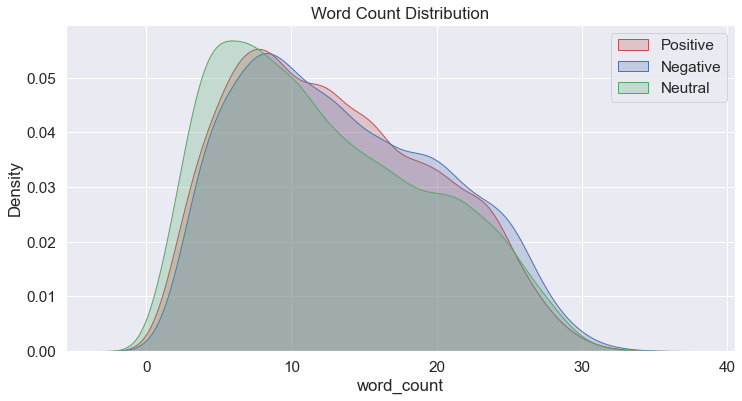

In [28]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(Pos_sent['word_count'], shade=True, color="r").set_title('Word Count Distribution')
p1=sns.kdeplot(Neg_sent['word_count'], shade=True, color="b")
p1=sns.kdeplot(Neu_sent['word_count'], shade=True, color="g")
plt.legend(labels =["Positive","Negative","Neutral"])

### Most Frequent Words In Each Sentiment

##### Positive

In [29]:
#most common or frequent word in positive sentiments
pos_itive = Counter([item for sublist in Pos_sent['freq_words'] for item in sublist])
words_positive = pd.DataFrame(pos_itive.most_common(20))
words_positive.columns = ['Frequent_words','word_count']
pos_itive_w = px.treemap(words_positive, path=['Frequent_words'], values='word_count',title='Most Frequent Positive Words')
pos_itive_w.show()

##### Negative

In [30]:
#most common or frequent word in Negative sentiments
neg_itive = Counter([item for sublist in Neg_sent['freq_words'] for item in sublist])
words_negative = pd.DataFrame(neg_itive.most_common(20))
words_negative.columns = ['Frequent_words','word_count']
Negative_chart= px.bar(words_negative, x="word_count", y="Frequent_words", title='Frequent Negative Words', orientation='h', 
             width=700, height=700,color='Frequent_words')
Negative_chart.show()

##### Neutral

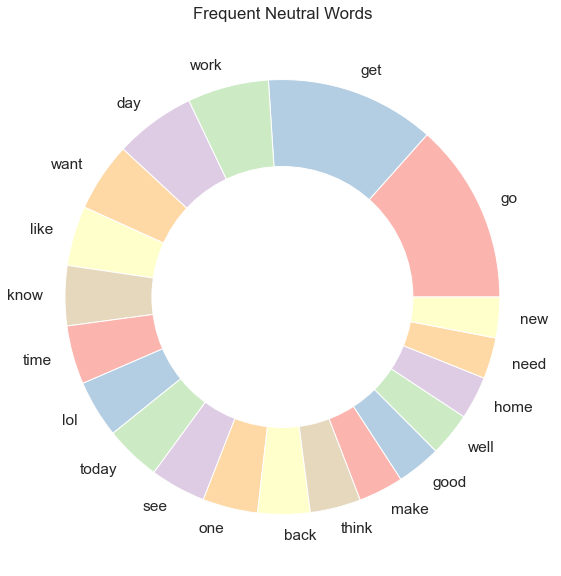

In [31]:
#most common or frequent word in neutral sentiments
Neu_tral = Counter([item for sublist in Neu_sent['freq_words'] for item in sublist])
words_neutral = pd.DataFrame(Neu_tral.most_common(20))
words_neutral.columns = ['Frequent_words','word_count']
plt.figure(figsize=(18,10))
my_donut=plt.Circle((0,0), 0.6, color='white')
plt.pie(words_neutral['word_count'], labels=words_neutral.Frequent_words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_donut)
plt.title('Frequent Neutral Words')
plt.show()

### Word Cloud For Tweets Based On Sentiments

##### Word Cloud for Positive Tweets

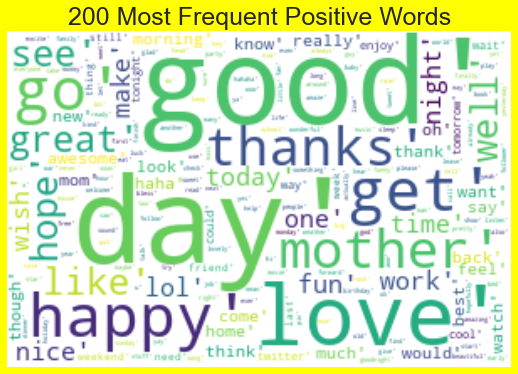

In [32]:
#positive tweets Wordcloud
words = []
for w in Pos_sent['lemmatization'].values:
    words+=w
mostcommon = FreqDist(words).most_common(200)

wordcloud = WordCloud(width=300, height=200, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('200 Most Frequent Positive Words', fontsize=25)
plt.tight_layout(pad=0)
plt.show()

##### Word Cloud for Negative Tweets

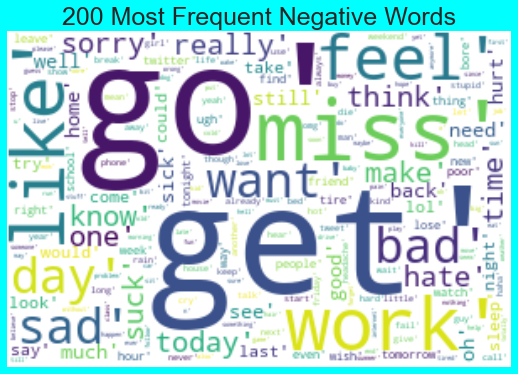

In [33]:
#Negative tweets Wordcloud
words = []
for w in Neg_sent['lemmatization'].values:
    words+=w
mostcommon = FreqDist(words).most_common(200)

wordcloud = WordCloud(width=300, height=200, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(10,5), facecolor='White')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('200 Most Frequent Negative Words', fontsize=25)
plt.tight_layout(pad=0)
plt.show()

##### Word Cloud for Neutral Tweets

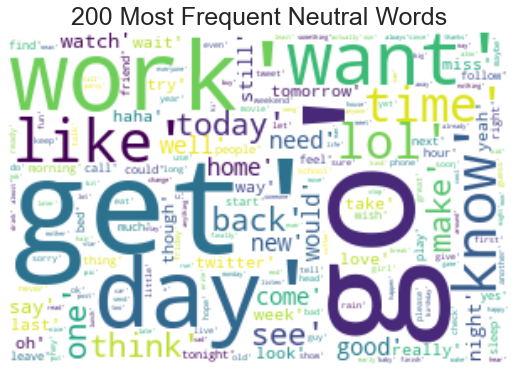

In [34]:
#Neutral tweets Wordcloud
words = []
for w in Neu_sent['lemmatization'].values:
    words+=w
mostcommon = FreqDist(words).most_common(200)

wordcloud = WordCloud(width=300, height=200, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(10,5), facecolor='White')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('200 Most Frequent Neutral Words', fontsize=25)
plt.tight_layout(pad=0)
plt.show()

### Unique Words

Text(0.5, 0.98, 'Unique words based on Sentiment')

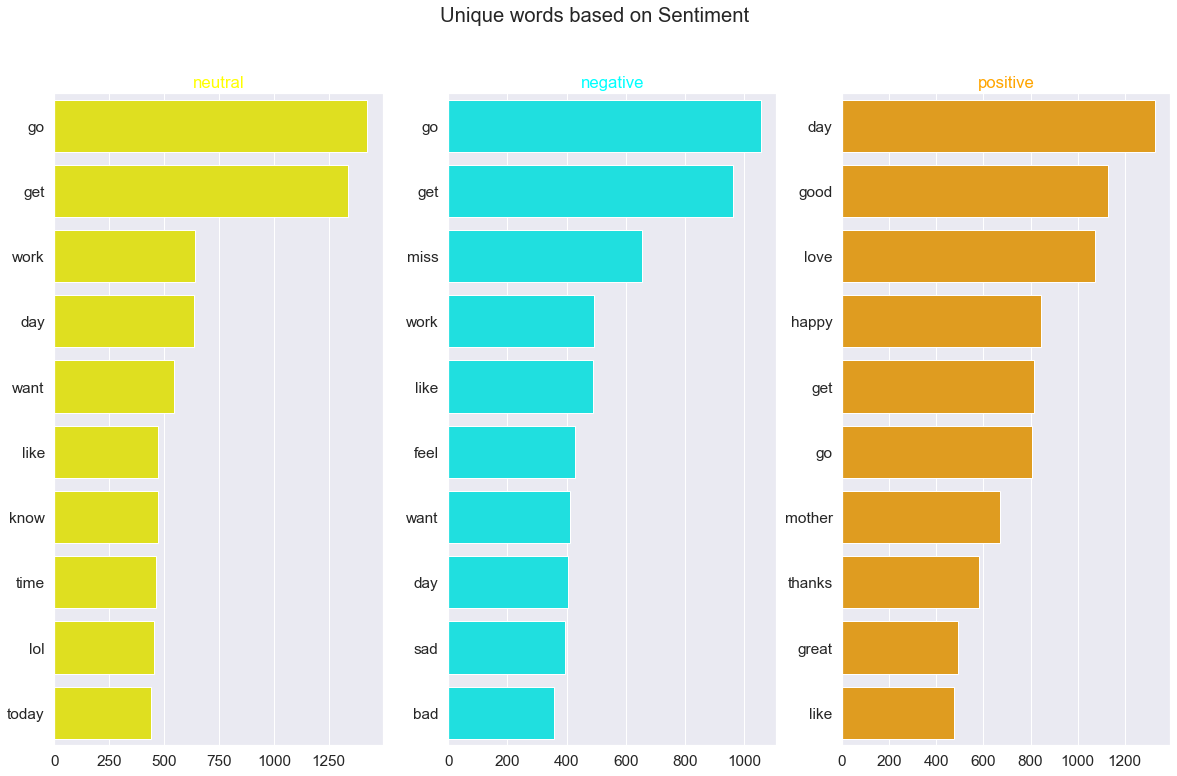

In [35]:
sent=tweet_df.sentiment.unique()
colors=['yellow','cyan','orange']
fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    unique_words=tweet_df[tweet_df['sentiment']==sent[i]]['lemmatization']
    uni_word=[p for pun in unique_words.values for p in pun]
    counter=Counter(uni_word).most_common(10)
    x=[]
    y=[]
    for word,count in counter[:20]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
fig.suptitle("Unique words based on Sentiment")

In [36]:
tweet_df['lemm_Join'] = tweet_df['lemmatization'].apply(lambda l: ' '.join(l))
tweet_df.head(4)

textID                                            text sentiment  \
0  cb774db0d1             I`d have responded, if I were going   neutral   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                       my boss is bullying me...  negative   
3  9642c003ef                  what interview! leave me alone  negative   

                      freq_words  \
0           [would, respond, go]   
1  [sooo, sad, miss, san, diego]   
2                   [bos, bully]   
3      [interview, leave, alone]   

                                   text_lowerCase  \
0             i`d have responded, if i were going   
1   sooo sad i will miss you here in san diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   

                                  no_txt_contrac  \
0        i would have responded, if i were going   
1  sooo sad i will miss you here in san diego!!!   
2                      my boss is bullying me...   
3                 what interview! leave me alone   

                                   Clean_text  \
0      i would have responded if i were going   
1  sooo sad i will miss you here in san diego   
2                      my boss is bullying me   
3               what interview leave me alone   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   
3                [what, interview, leave, me, alone]   

                       stopwords  \
0      [would, responded, going]   
1  [sooo, sad, miss, san, diego]   
2               [boss, bullying]   
3      [interview, leave, alone]   

                                             Tagging  \
0           [(would, n), (responded, v), (going, v)]   
1  [(sooo, a), (sad, a), (miss, n), (san, n), (di...   
2                         [(boss, n), (bullying, v)]   
3           [(interview, n), (leave, v), (alone, r)]   

                   lemmatization  text_length  word_count  \
0           [would, respond, go]           38           8   
1  [sooo, sad, miss, san, diego]           42          10   
2                   [bos, bully]           22           5   
3      [interview, leave, alone]           29           5   

                 lemm_Join  
0         would respond go  
1  sooo sad miss san diego  
2                bos bully  
3    interview leave alone

### Pre-Processing for Modelling

In [37]:
tweet_df.head(3)

textID                                            text sentiment  \
0  cb774db0d1             I`d have responded, if I were going   neutral   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                       my boss is bullying me...  negative   

                      freq_words  \
0           [would, respond, go]   
1  [sooo, sad, miss, san, diego]   
2                   [bos, bully]   

                                   text_lowerCase  \
0             i`d have responded, if i were going   
1   sooo sad i will miss you here in san diego!!!   
2                       my boss is bullying me...   

                                  no_txt_contrac  \
0        i would have responded, if i were going   
1  sooo sad i will miss you here in san diego!!!   
2                      my boss is bullying me...   

                                   Clean_text  \
0      i would have responded if i were going   
1  sooo sad i will miss you here in san diego   
2                      my boss is bullying me   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   

                       stopwords  \
0      [would, responded, going]   
1  [sooo, sad, miss, san, diego]   
2               [boss, bullying]   

                                             Tagging  \
0           [(would, n), (responded, v), (going, v)]   
1  [(sooo, a), (sad, a), (miss, n), (san, n), (di...   
2                         [(boss, n), (bullying, v)]   

                   lemmatization  text_length  word_count  \
0           [would, respond, go]           38           8   
1  [sooo, sad, miss, san, diego]           42          10   
2                   [bos, bully]           22           5   

                 lemm_Join  
0         would respond go  
1  sooo sad miss san diego  
2                bos bully

In [38]:
del_cols_list = ['textID', 'freq_words', 'text_lowerCase','no_txt_contrac','text','stopwords'\
                 ,'Tagging','lemmatization','text_length','word_count','lemm_Join','Clean_text']
df2 = tweet_df.drop(columns = del_cols_list)
df2.head()

sentiment                                     tokenized_text
0   neutral    [i, would, have, responded, if, i, were, going]
1  negative  [sooo, sad, i, will, miss, you, here, in, san,...
2  negative                       [my, boss, is, bullying, me]
3  negative                [what, interview, leave, me, alone]
4  negative  [sons, of, why, could, not, they, put, them, o...

In [39]:
X = df2['tokenized_text']

X.head()

0      [i, would, have, responded, if, i, were, going]
1    [sooo, sad, i, will, miss, you, here, in, san,...
2                         [my, boss, is, bullying, me]
3                  [what, interview, leave, me, alone]
4    [sons, of, why, could, not, they, put, them, o...
Name: tokenized_text, dtype: object

In [40]:
#Encoding target labels of 'Sentiment'
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
Y = l.fit_transform(df2['sentiment'])

In [41]:
print(X[9])
print(Y[9])
#'2' indicates its a positive sentiment

['journey', 'wow', 'you', 'just', 'became', 'cooler', 'hehe', 'is', 'that', 'possible']
2


### Modeling 
we have used three different modeles:-
- Bidirectional - LSTM using Neural Networks
- Using CNN with Hyper-parameter Tuning
- RNN with Hyper-Parameter Tuning

### Model 1: Bidirectional - LSTM using Neural Networks

#### Why this model and its process of building it?
- LSTM - Long Short Term Memory - It's a variant(or a special kind) of RNN which has inherent feature to learn the context of words which are further along the text that carry contextual meeting rather than just adjacent words in a dataset. 
- We are following a Bidirectional approach - This a wrapper for RNNs. It carries the contect from both left to right and right to left in an RNN layer.
- After we split the data, we will tokenize the data, pad the sequences to vectorize the tweets
- we will use 'relu' activation for hidden layers, SGD optimizer, cross enthropy and softmax activation at the output layer

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 5000
max_len=50
def tokenize_and_pad_seq(text):
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before:\n', df2['tokenized_text'][0])
X, tokenizer = tokenize_and_pad_seq(df2['tokenized_text'])
print('After:\n', X[0])

Before:
 ['i', 'would', 'have', 'responded', 'if', 'i', 'were', 'going']
After:
 [  1  68  14  67   1 133  32   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [43]:
# #saving the model using pickle
# import pickle

# # saving
# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

#### Train-Validation-Test Split

In [44]:
from sklearn.model_selection import train_test_split
y = pd.get_dummies(df2['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [45]:
print("Size of Dataset for Bi-LSTM model---->\n")
print("Train Set: ", X_train.shape,y_train.shape )
print("Validation Set: ", X_val.shape,y_val.shape )
print("Test Set: ", X_test.shape, y_test.shape)

Size of Dataset for Bi-LSTM model---->

Train Set:  (16488, 50) (16488, 3)
Validation Set:  (5496, 50) (5496, 3)
Test Set:  (5497, 50) (5497, 3)


In [46]:
'''Function to calculate the f1 score'''
import keras.backend as K
def f1score(precision, recall):
    f1 = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1

In [47]:
#Importing Keras libraries
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import losses
#assigning values for intial execution of the model
vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
#defining the model:
def create_model():
    #we will be using Stochastic gradient descent within this model
    sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    # Build model
    model= Sequential() #sequential model is very good at getting the context of a sentence
    model.add(Embedding(vocab_size, embedding_size, input_length=50))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.4))
    model.add(Dense(3, activation='softmax')) #softmax on the out put layer 
    model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy', Precision(), Recall()])
    return model

In [48]:
# pip install numpy==1.18.5 #In some cases, for the keras is not compatible with the latest ver of numpy

In [49]:
# Compile model
model = create_model()
#summary of the model
print(model.summary())
# Train model
bs = 60
ep=20
model.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=bs, epochs=ep, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 32)            160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 50, 32)            3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 25, 32)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 195       
Total params: 179,939
Trainable params: 179,939
Non-trainable params: 0
__________________________________________________

In [50]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('F1 Score  : {:.4f}'.format(f1score(precision, recall)))


Accuracy  : 0.6740
F1 Score  : 0.6687


#### Hyper-Parameter Tuning

In [51]:
# import scikeras
# from scikeras.wrappers import KerasClassifier
model = KerasClassifier(build_fn=create_model)
#hyper parameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
batch_size = [50,100]
# activation = ['relu','sigmoid','tanh']
epochs = [30,40]
param_grid = dict(batch_size= batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
165/165 [==============================] - 2s 14ms/step - loss: 1.0891 - accuracy: 0.3983 - precision_1: 0.4898 - recall_1: 0.0015
Epoch 2/30
165/165 [==============================] - 2s 14ms/step - loss: 1.0819 - accuracy: 0.4014 - precision_1: 1.0000 - recall_1: 6.0650e-05
Epoch 3/30
165/165 [==============================] - 2s 14ms/step - loss: 1.0652 - accuracy: 0.4185 - precision_1: 0.6981 - recall_1: 0.0022
Epoch 4/30
165/165 [==============================] - 2s 14ms/step - loss: 1.0159 - accuracy: 0.4754 - precision_1: 0.6798 - recall_1: 0.0647
Epoch 5/30
165/165 [==============================] - 2s 14ms/step - loss: 0.9370 - accuracy: 0.5344 - precision_1: 0.6688 - recall_1: 0.2265
Epoch 6/30
165/165 [==============================] - 2s 14ms/step - loss: 0.8731 - accuracy: 0.5847 - precision_1: 0.6831 - recall_1: 0.3440
Epoch 7/30
165/165 [==============================] - 2s 14ms/step - loss: 0.8302 - accuracy: 0.6200 - precision_1: 0.6977 - recall_1: 0.4447
Ep

In [54]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))   

Best: 0.671943 using {'batch_size': 100, 'epochs': 30}


In [55]:
#Best: 0.670124 using {'batch_size': 50, 'epochs': 30}
#Fitting the model using 
from time import time
batch_size = 50
epochs = 30
t0 = time()
model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)
t1 = time()
print("time taken is ", t1-t0)

Epoch 1/30
330/330 [==============================] - 4s 12ms/step - loss: 1.0895 - accuracy: 0.3979 - precision_2: 0.3710 - recall_2: 0.0014 - val_loss: 1.0780 - val_accuracy: 0.4092 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/30
330/330 [==============================] - 3s 10ms/step - loss: 1.0645 - accuracy: 0.4215 - precision_2: 0.6565 - recall_2: 0.0052 - val_loss: 1.0277 - val_accuracy: 0.4844 - val_precision_2: 0.8356 - val_recall_2: 0.0222
Epoch 3/30
330/330 [==============================] - 3s 10ms/step - loss: 0.9713 - accuracy: 0.5100 - precision_2: 0.6805 - recall_2: 0.1582 - val_loss: 0.9165 - val_accuracy: 0.5591 - val_precision_2: 0.6794 - val_recall_2: 0.2757
Epoch 4/30
330/330 [==============================] - 4s 11ms/step - loss: 0.8756 - accuracy: 0.5866 - precision_2: 0.6786 - recall_2: 0.3489 - val_loss: 0.8648 - val_accuracy: 0.5879 - val_precision_2: 0.6697 - val_recall_2: 0.4003
Epoch 5/30
330/330 [==============================] - 4s 11m

As you can see, the best accuracy comes to 78%, Precision: 0.79 and Recall to .7814

### Model 2: Using CNN with Hyper-parameter Tuning

#### Why this model and its process of building it?
- CNN is generally used on image data but can be tried on text data as well. This model can be used to figure out the relationship between words in dataset
- Although not specifically developed for non-image data, CNNs achieve state-of-the-art results on problems such as document/text classification used in sentiment analysis and related problems
- Convert the 'Sentiment' into categorical codes, define the model and find the best hyper parameters to get the most optimal results.
- we will use 'tanh' activation for hidden layers, SGD optimizer, cross enthropy and softmax activation at the output layer

In [56]:
#importing train-val-test split libraries and coverting the label data to categorical codes
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
df3 = df2
df3.sentiment = df3.sentiment.astype("category")
df3.sentiment = df3.sentiment.cat.codes
y = to_categorical(df3['sentiment'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.25, random_state=1)

In [57]:
#intializing the set of parameters for tuning hyper parameter
activation = ["selu", "elu", "sigmoid", "tanh"]
optimizer = ["adam", "SGD"]
epochs = [5,10,15,20]
batchsize = [10,20,30,40,60]

In [58]:
maxlen = 50
#defining the CNN model
def cnn_keras(activation,optimizer,epochs,batchsize):
  embedding_dim = 100

  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                          output_dim=embedding_dim,
                          input_length=maxlen))

  model.add(Conv1D(32, kernel_size=2, activation=activation))
  model.add(layers.MaxPooling1D(2))
  model.add(Conv1D(32, kernel_size=2, activation=activation))
  model.add(Dropout(0.25))
  model.add(Conv1D(16, kernel_size=2, activation=activation))
  model.add(layers.MaxPooling1D(2))
  model.add(Conv1D(16, kernel_size=2, activation=activation))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(64, activation='tanh'))
  model.add(Dropout(0.5))

  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(X_train2, y_train2,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_val2, y_val2),
                    batch_size=batchsize)
  
  return history, model

In [59]:
#importing Keras model
import keras
from keras.models import Sequential
from keras import regularizers
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras import layers
from sklearn.metrics import accuracy_score, f1_score
select_act = {}
sel_opt = {}

#Choosing the most optimal activation
for i in activation:
  history, model = cnn_keras(i,"adam",5,16) #passing adam as the default optimizer
  temp = {i:model.evaluate(X_val2,y_val2)[1]}#evaluating the model and getting the accuracy score
  select_act.update(temp) #updating 
  keras.backend.clear_session()

select_act_final = max(select_act, key=select_act.get)
print("best activation fn:  ",select_act_final)

#Choosing the best optimizer

for i in optimizer:
  history, model = cnn_keras(select_act_final,i,5,16)
  temp = {i:model.evaluate(X_val2,y_val2)[1]} #evaluation on the validation data and get the accuracy score
  sel_opt.update(temp)
  keras.backend.clear_session()

sel_opt_final = max(sel_opt, key=sel_opt.get)
print("best optimizer is ",sel_opt_final)


#choosing epoch based on the accuracy score
acc_train_epoch = {}
acc_val_epoch = {}
for i in epochs:
  history, model = cnn_keras(select_act_final,sel_opt_final,i,16)
  temp_train = {i:model.evaluate(X_train2,y_train2)[1]}
  temp_val = {i:model.evaluate(X_val2,y_val2)[1]}#evaluation on the validation data and get the accuracy score
  acc_train_epoch.update(temp_train)
  acc_val_epoch.update(temp_val)
  keras.backend.clear_session()

sel_epoch_final = max(acc_val_epoch, key=acc_val_epoch.get)
print("best epoch:  ",sel_epoch_final)


172/172 [==============================] - 0s 2ms/step - loss: 1.0229 - accuracy: 0.6596
best activation fn:   elu
172/172 [==============================] - 0s 2ms/step - loss: 1.0785 - accuracy: 0.4199
best optimizer is  adam
172/172 [==============================] - 0s 2ms/step - loss: 1.6999 - accuracy: 0.6226
best epoch:   5


In [60]:
# choosing the best batch size
acc_train_batch = {}
acc_val_batch = {}
for i in batchsize:
  history, model = cnn_keras(select_act_final,sel_opt_final,sel_epoch_final,i)
  temp_train = {i:model.evaluate(X_train2,y_train2)[1]}#evaluation on the validation data and get the accuracy score
  temp_val = {i:model.evaluate(X_val2,y_val2)[1]}
  acc_train_batch.update(temp_train)
  acc_val_batch.update(temp_val)
  keras.backend.clear_session()

sel_batch_final = max(acc_val_batch, key=acc_val_batch.get)
print("best batchsize:  ",sel_batch_final)


172/172 [==============================] - 0s 2ms/step - loss: 1.0311 - accuracy: 0.6557
best batchsize:   10


In [61]:
from time import time
# Evaluating using the best model
t0 = time()
history, model = cnn_keras(select_act_final,sel_opt_final,sel_epoch_final,sel_batch_final)
pred = np.argmax(model.predict(X_test2), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=np.argmax(y_test2,axis=1)))
print("test f1 score = ",f1_score(y_pred=pred, y_true=np.argmax(y_test2,axis=1), average="weighted"))

t1 = time()
print("time taken to evaluate the model:  ", t1-t0)

test accuracy score =  0.6398035291977442
test f1 score =  0.6414583620329212
time taken to evaluate the model:   55.37045097351074


### Model 3: RNN with Hyper-Parameter Tuning

#### Why this model and its process of building it?
- RNNs in general and LSTMs in particular have received the most success when working with sequences of words and paragraphs, generally called natural language processing.
- Here, we will not go for LSTM(covered in model 1), but we will deal with the basic RNN approach and show you a comparision. This model is popularily used for Text and pattern recognition.
- Convert the 'Sentiment' into categorical codes, define the model and find the best hyper parameters to get the most optimal results.
- we will use 'softmax' as default activation function for hidden layers, SGD optimizer, cross enthropy 

In [62]:
#importing train-val-test split libraries and coverting the label data to categorical codes
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
df4 = df2
df4.sentiment = df4.sentiment.astype("category")
df4.sentiment = df4.sentiment.cat.codes
y = to_categorical(df4['sentiment'])
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=1)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.25, random_state=1)

In [63]:
maxlen = 50
#defining the RNN model

def rnn_keras(activation,optimizer,epochs,batchsize):
  embedding_dim = 100

  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size,output_dim=embedding_dim, input_length=maxlen))
  model.add(layers.SimpleRNN(64))#implementing the Simple RNN model(For LSTM, check model 1 of this notebook)
  model.add(Dense(3,activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(X_train3, y_train3,epochs=epochs,verbose=0,validation_data=(X_val3, y_val3),
                    batch_size=batchsize)
  
  return history, model

In [64]:
select_act = {}
sel_opt = {}

#Choosing the most optimal activation
for i in activation:
  history, model = rnn_keras(i,"adam",5,16)
  temp = {i:model.evaluate(X_val3,y_val3)[1]}
  select_act.update(temp)
  keras.backend.clear_session()

select_act_final = max(select_act, key=select_act.get)
print("best activation function is ",select_act_final)

#Choosing the best optimizer
sel_optimizer = {}
for i in optimizer:
  history, model = rnn_keras(select_act_final,i,5,16)
  temp = {i:model.evaluate(X_val3,y_val3)[1]}#evaluation on the validation data and get the accuracy score
  sel_opt.update(temp)
  keras.backend.clear_session()

sel_opt_final = max(sel_opt, key=sel_opt.get)
print("best optimizer is ",sel_opt_final)



172/172 [==============================] - 0s 2ms/step - loss: 1.0511 - accuracy: 0.4683
best activation function is  selu
172/172 [==============================] - 0s 2ms/step - loss: 0.9922 - accuracy: 0.4858
best optimizer is  SGD


In [65]:
#choosing epoch based on the accuracy score

acc_train_epoch = {}
acc_val_epoch = {}
for i in epochs:
  history, model = rnn_keras(select_act_final,sel_opt_final,i,16)
  temp_train = {i:model.evaluate(X_train3,y_train3)[1]}#evaluation on the validation data and get the accuracy score
  temp_val = {i:model.evaluate(X_val3,y_val3)[1]}
  acc_train_epoch.update(temp_train)
  acc_val_epoch.update(temp_val)
  keras.backend.clear_session()

sel_epoch_final = max(acc_val_epoch, key=acc_val_epoch.get)
print("best epoch is ",sel_epoch_final)

#choosing the best batchsize
acc_train_batch = {}
acc_val_batch = {}
for i in batchsize:
  history, model = rnn_keras(select_act_final,sel_opt_final,sel_epoch_final,i)
  temp_train = {i:model.evaluate(X_train3,y_train3)[1]}#evaluation on the validation data and get the accuracy score
  temp_val = {i:model.evaluate(X_val3,y_val3)[1]}
  acc_train_batch.update(temp_train)
  acc_val_batch.update(temp_val)
  keras.backend.clear_session()

sel_batch_final = max(acc_val_batch, key=acc_val_batch.get)
print("best batchsize:  ",sel_batch_final)


172/172 [==============================] - 0s 3ms/step - loss: 0.8750 - accuracy: 0.6083
best epoch is  20
172/172 [==============================] - 0s 3ms/step - loss: 0.9992 - accuracy: 0.5180
best batchsize:   20


In [66]:
#evaluating on the best parameters

t0 = time()
history, model = rnn_keras(select_act_final,sel_opt_final,sel_epoch_final,sel_batch_final)
pred = np.argmax(model.predict(X_test3), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=np.argmax(y_test3, axis = 1)))
t1 = time()
print("time taken:  ", t1-t0)

test accuracy score =  0.5948699290522103
time taken:   119.44204235076904


### References
- https://www.sciencedirect.com/science/article/pii/S1877050920300910/pdf?md5=4dae8287aae3f950b95a545f9641fc2b&pid=1-s2.0-S1877050920300910-main.pdf
- https://neptune.ai/blog/tokenization-in-nlp
- https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47
- https://towardsdatascience.com/part-of-speech-tagging-for-beginners-3a0754b2ebba#:~:text=Part%2Dof%2Dspeech%20(POS,the%20word%20and%20its%20context.
- https://towardsdatascience.com/lemmatization-in-natural-language-processing-nlp-and-machine-learning-a4416f69a7b6
- https://monkeylearn.com/sentiment-analysis/
- https://huggingface.co/blog/sentiment-analysis-twitter
- https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners/
-https://towardsdatascience.com/data-transformation-and-feature-engineering-e3c7dfbb4899
- https://link.springer.com/article/10.1007/s10462-022-10144-1
- https://levelup.gitconnected.com/visualization-in-python-creating-word-cloud-a3e1e73e7adb
- https://medium.com/analytics-vidhya/sentiment-analysis-data-vectorization-52d3e711f054
- https://www.kaggle.com/code/casals90/data-cleaning-and-eda
- https://neptune.ai/blog/vectorization-techniques-in-nlp-guide
- https://blog.knoldus.com/text-data-vectorization-techniques-in-natural-language-processing/
- https://www.kaggle.com/code/abdokamr/eda-for-sentiment-analysis/notebook#3--Text-Data-Preprocessing
- https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- https://www.analyticsvidhya.com/blog/2021/06/twitter-sentiment-analysis-a-nlp-use-case-for-beginners
- https://www.kaggle.com/code/kritanjalijain/twitter-sentiment-analysis-lstm
- https://www.questionpro.com/blog/twitter-sentiment-analysis/